# Model Free Ink Analysis
### Sobel filter Ink signal Processing
I was testing with different processing techniques to make the ink signal for self-supervised techniques, I found this mix of sobel filter, histogram equalization with some median bluring to do the job well in crackle dense areas. This doesn't make all of the ink detected by the ML models visible, but is useful for finding some ink without any models, 


In [2]:
from tqdm.notebook import tqdm
import skimage
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = 933120000
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = str(pow(2,40))



segment_path='C:/PHerc1667.volpkg/paths/20231210121321/'
output_path='../20231016151000_sobel/'
for i in tqdm(range(65)):
    img_blur=cv2.imread(f"{segment_path}/layers/{i:02}.tif", 0)
    img_blur = cv2.medianBlur(img_blur,3)
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detect
    equ = cv2.equalizeHist(np.abs(sobelxy).astype(np.uint8))
    equ = cv2.medianBlur(equ,9)
    Image.fromarray(equ).convert('L').save(f'{output_path}/{i}.png')

  0%|          | 0/65 [00:00<?, ?it/s]

We can do a simple analysis, where we grab the ink labels we have, and examine how much of the letter is visible, the contrast of ink vs no ink area, this could be used ot give an initial localization of the letter in 3d 

In [14]:
# h,w=middle_layers[0].size
# h=h//16
# w=w//16
# middle_layers=[Image.fromarray(cv2.imread(f'{output_path}/{i}.png',0)).resize((h, w), Image.Resampling.LANCZOS) for i in range(27,41)]

# middle_layers[0].save('im.gif', save_all=True, append_images=middle_layers[1:], optimize=False, duration=600, loop=0)


# Rendering the layers
Here is a quick gif render of the middle layers with the sobel filter, you will notice that some letters are already visible! 

![SegmentLocal](im.gif "segment")


You will notice that the letters appear to last for a couple layers then fade away, and this approach sees far less characters than the machine learning based ink detection. 

Of course, the 2d sobel filter is not the best that we can do, however it's a very simple idea, and almost highlights the easiest detectable letters. 

We can explore the agreement between our labels and the signal found by the sobel filter. 

  0%|          | 0/65 [00:00<?, ?it/s]

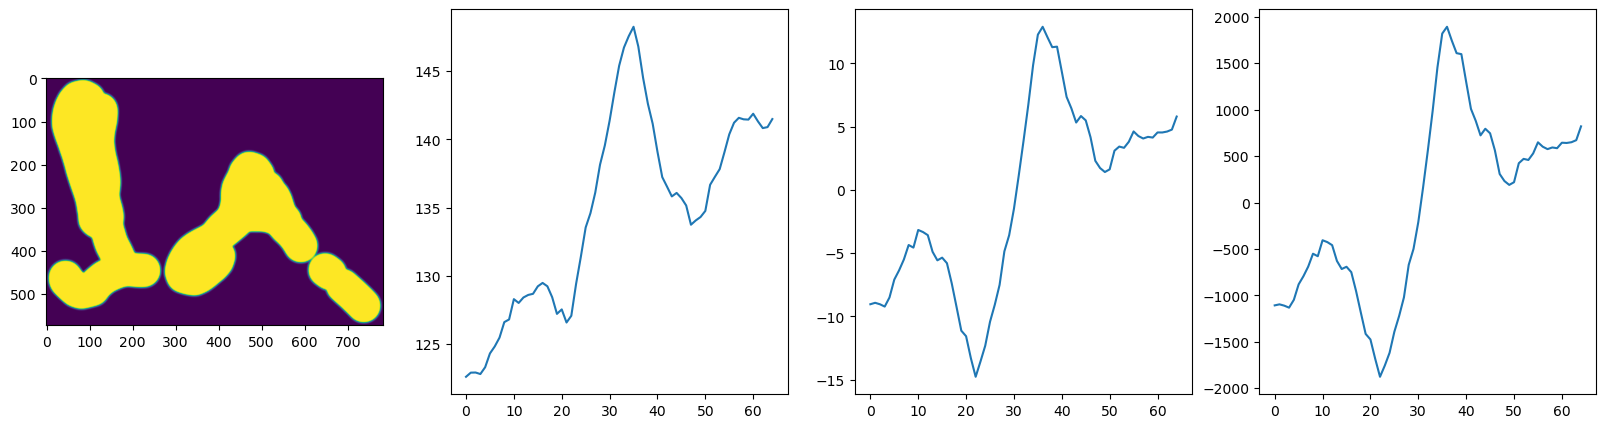

  0%|          | 0/65 [00:00<?, ?it/s]

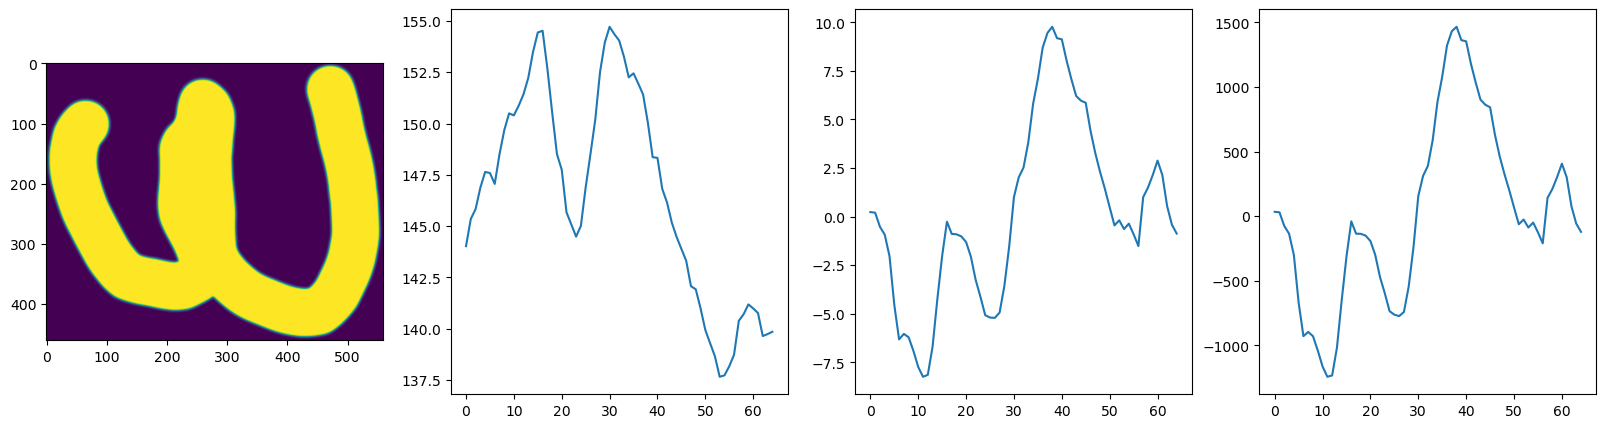

  0%|          | 0/65 [00:00<?, ?it/s]

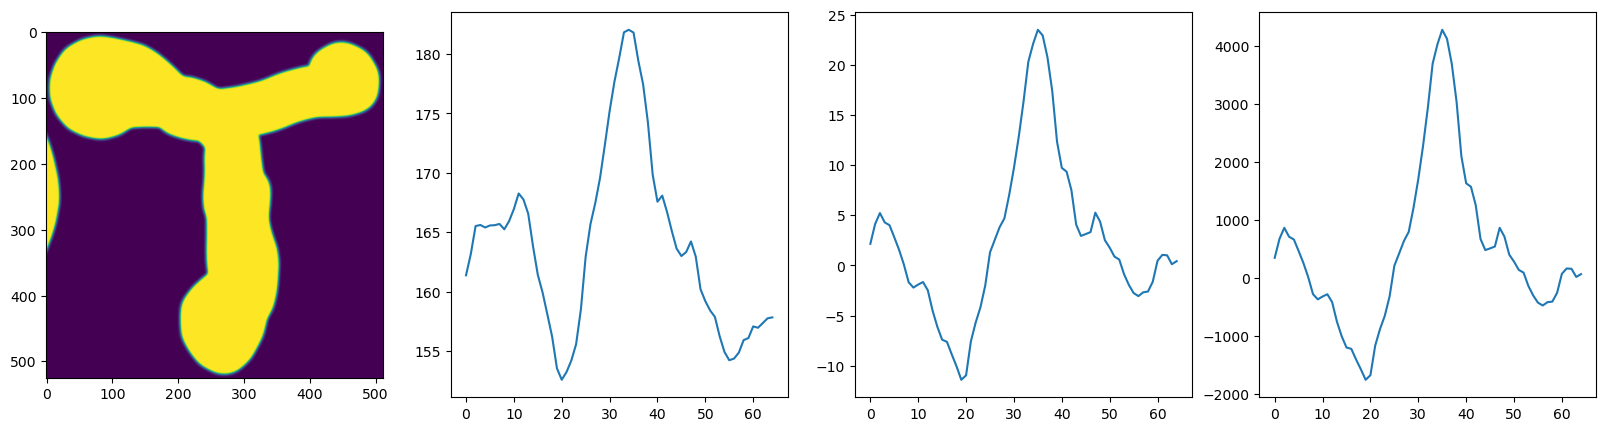

  0%|          | 0/65 [00:00<?, ?it/s]

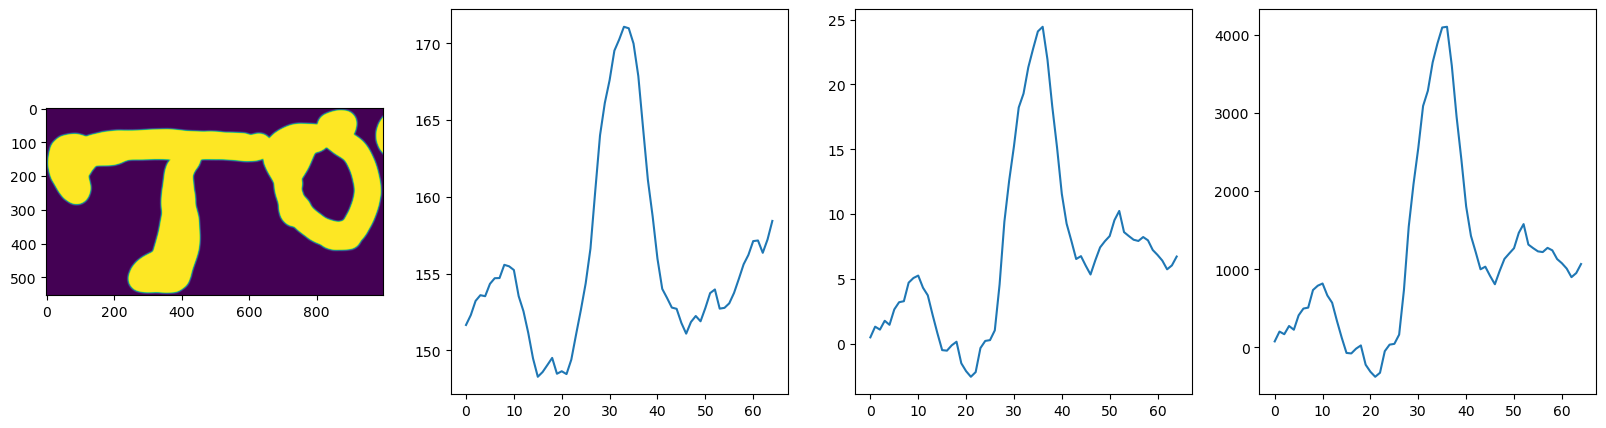

  0%|          | 0/65 [00:00<?, ?it/s]

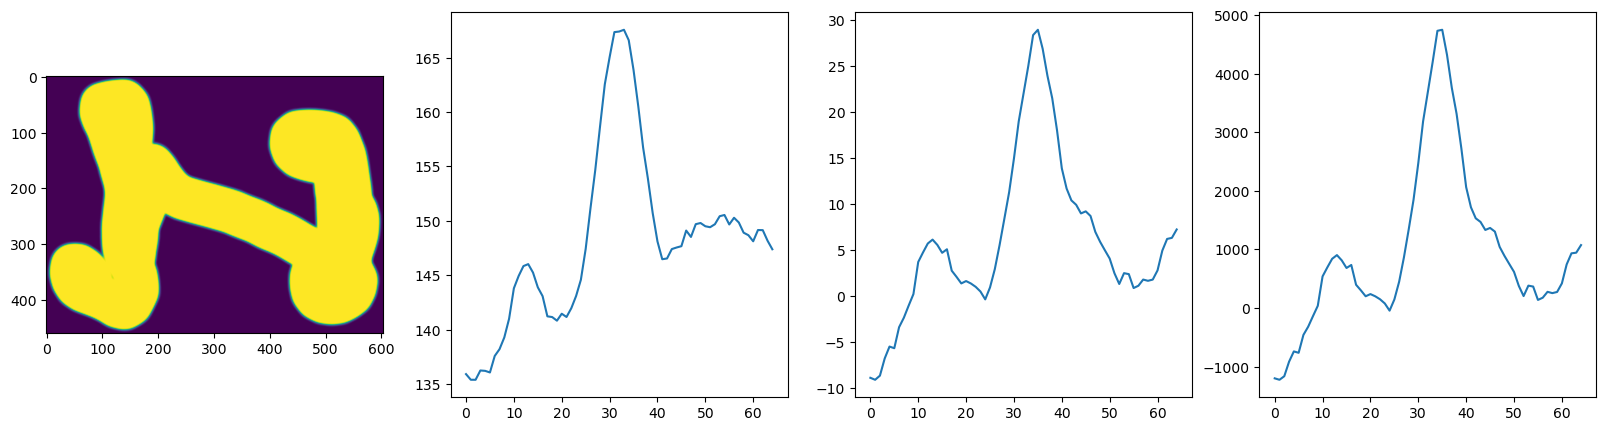

  0%|          | 0/65 [00:00<?, ?it/s]

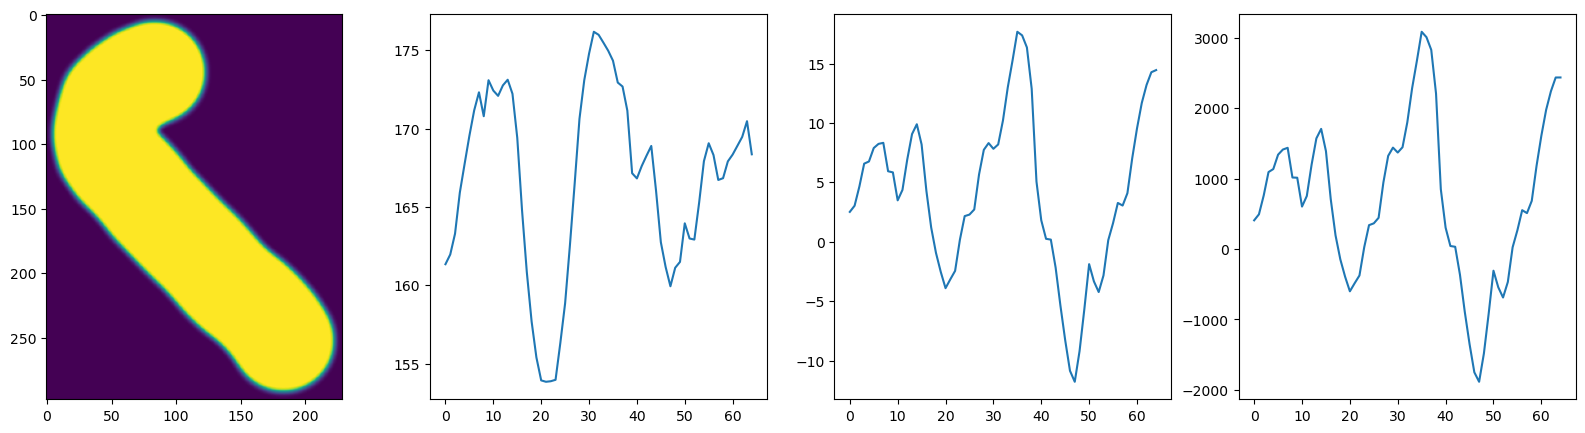

  0%|          | 0/65 [00:00<?, ?it/s]

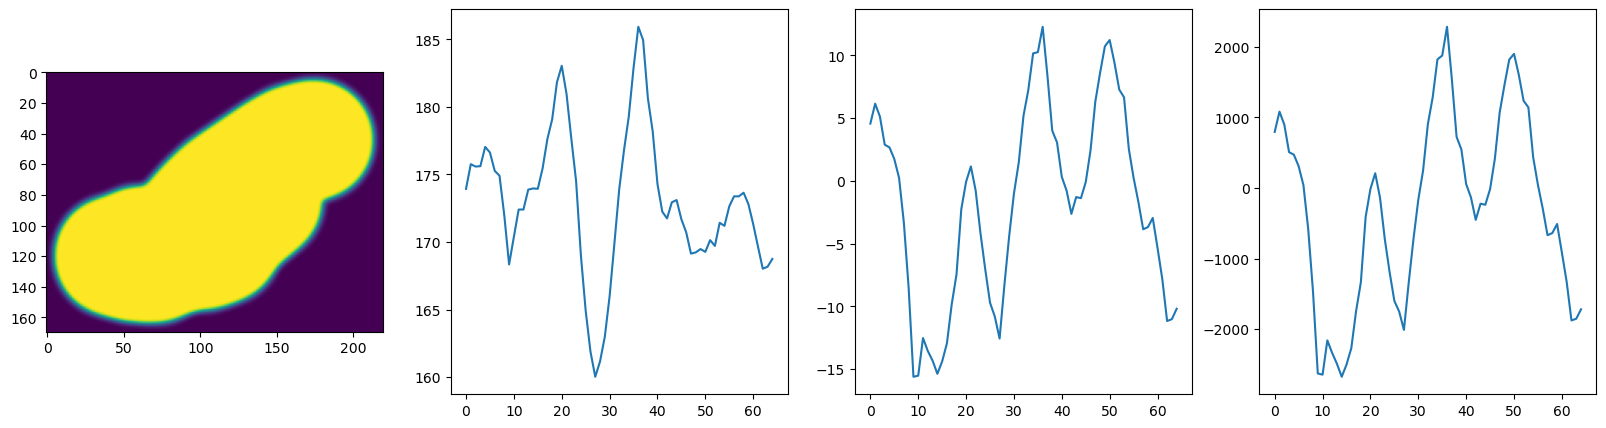

  0%|          | 0/65 [00:00<?, ?it/s]

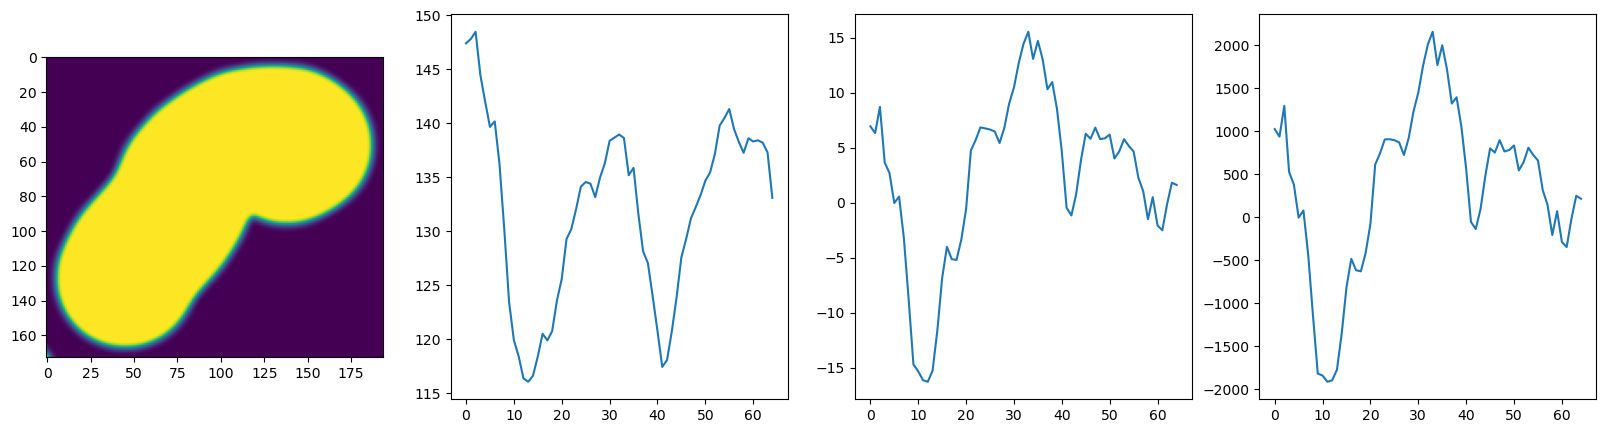

  0%|          | 0/65 [00:00<?, ?it/s]

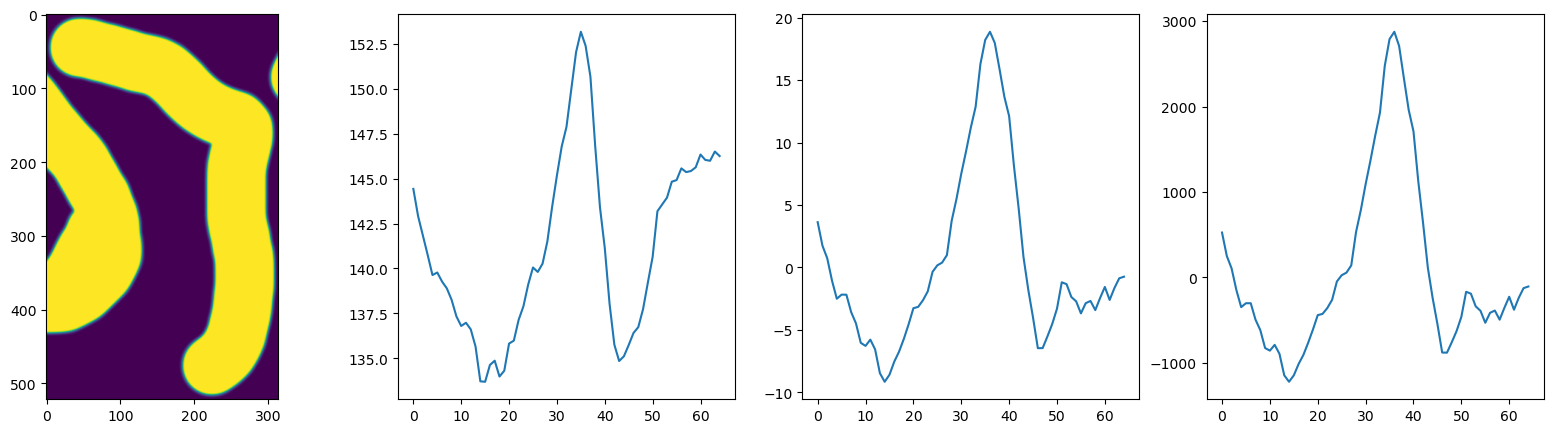

  0%|          | 0/65 [00:00<?, ?it/s]

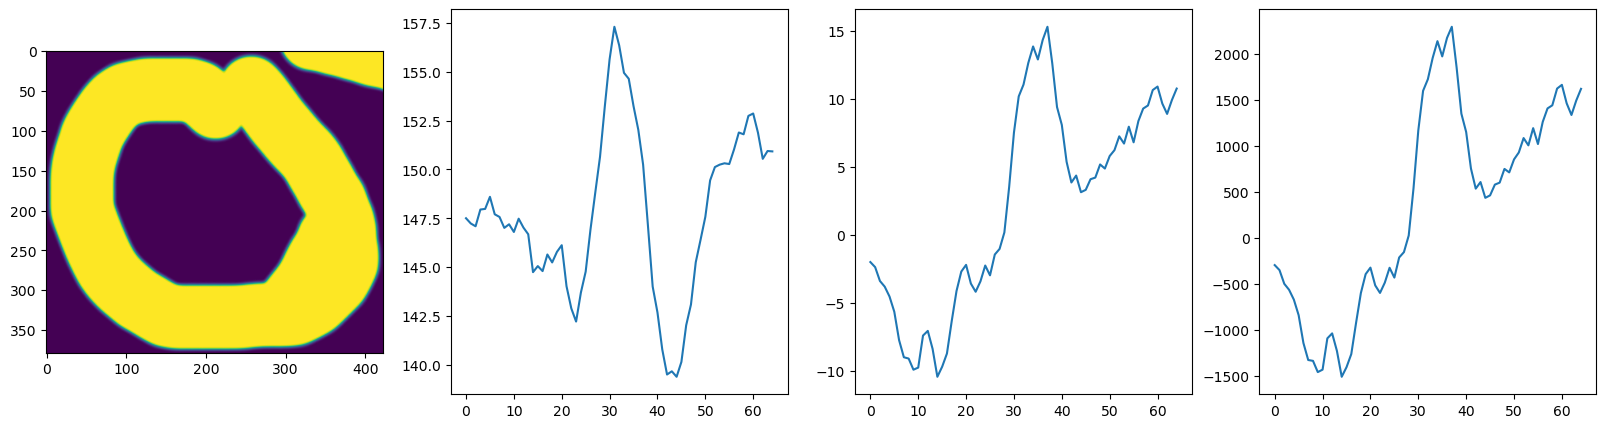

  0%|          | 0/65 [00:00<?, ?it/s]

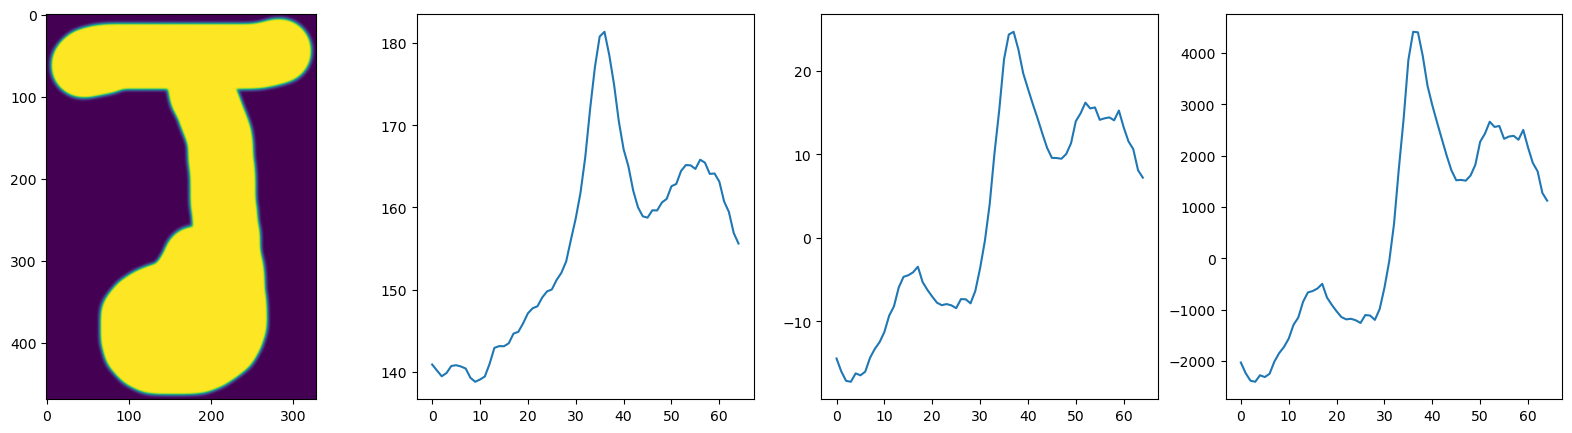

  0%|          | 0/65 [00:00<?, ?it/s]

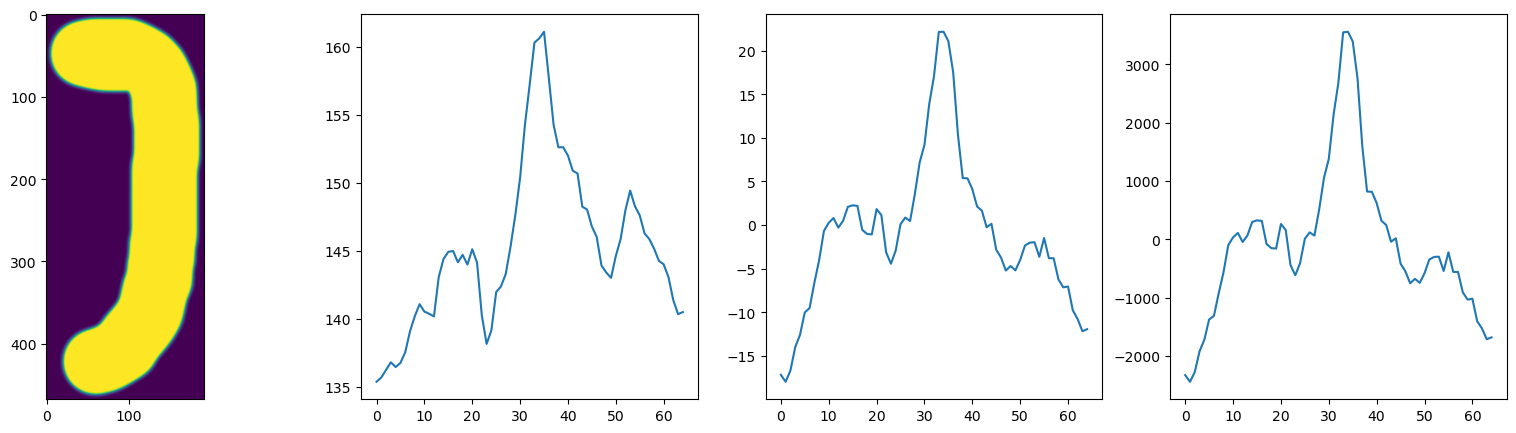

  0%|          | 0/65 [00:00<?, ?it/s]

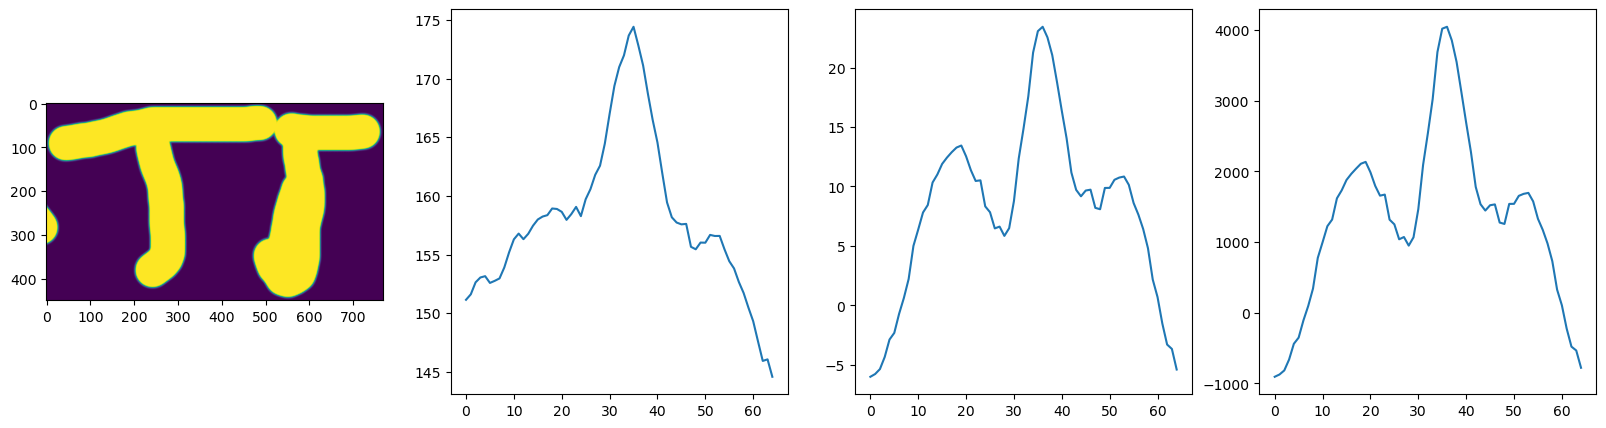

  0%|          | 0/65 [00:00<?, ?it/s]

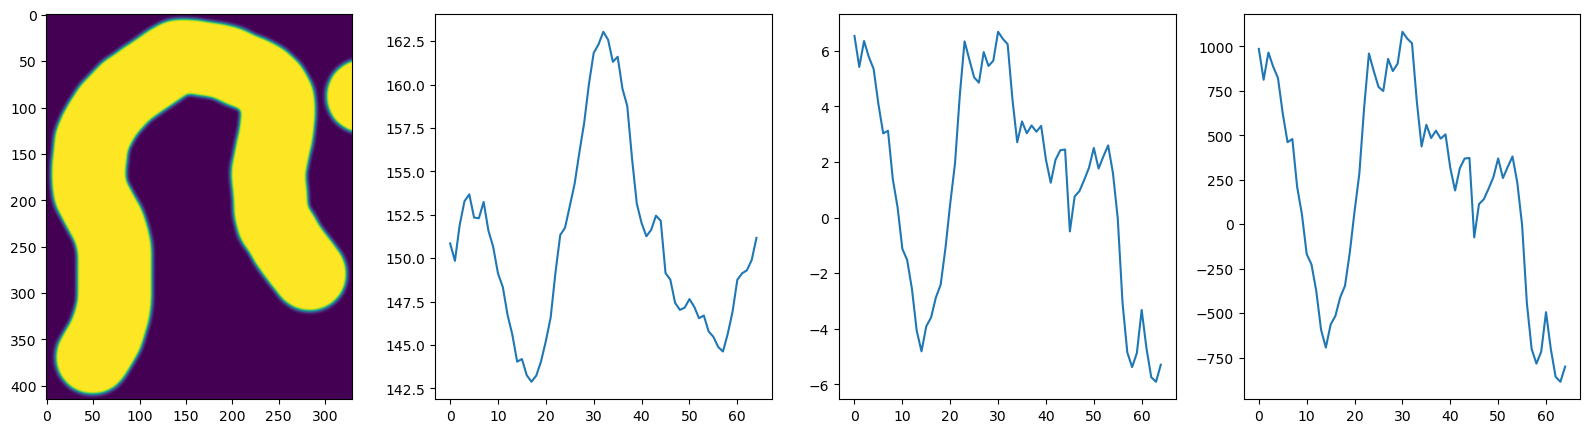

  0%|          | 0/65 [00:00<?, ?it/s]

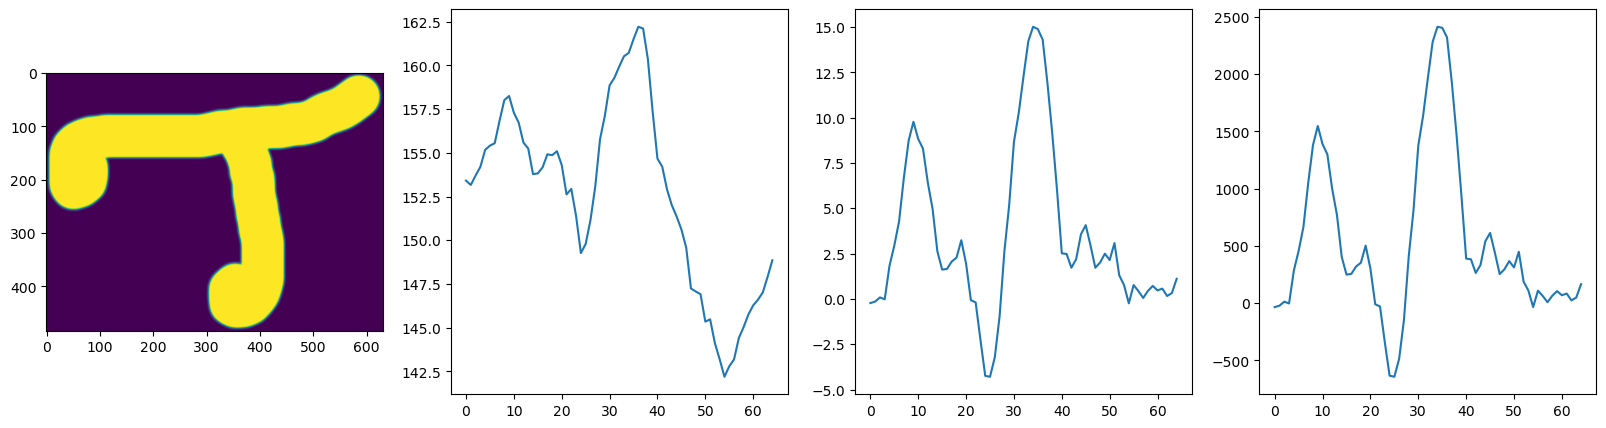

  0%|          | 0/65 [00:00<?, ?it/s]

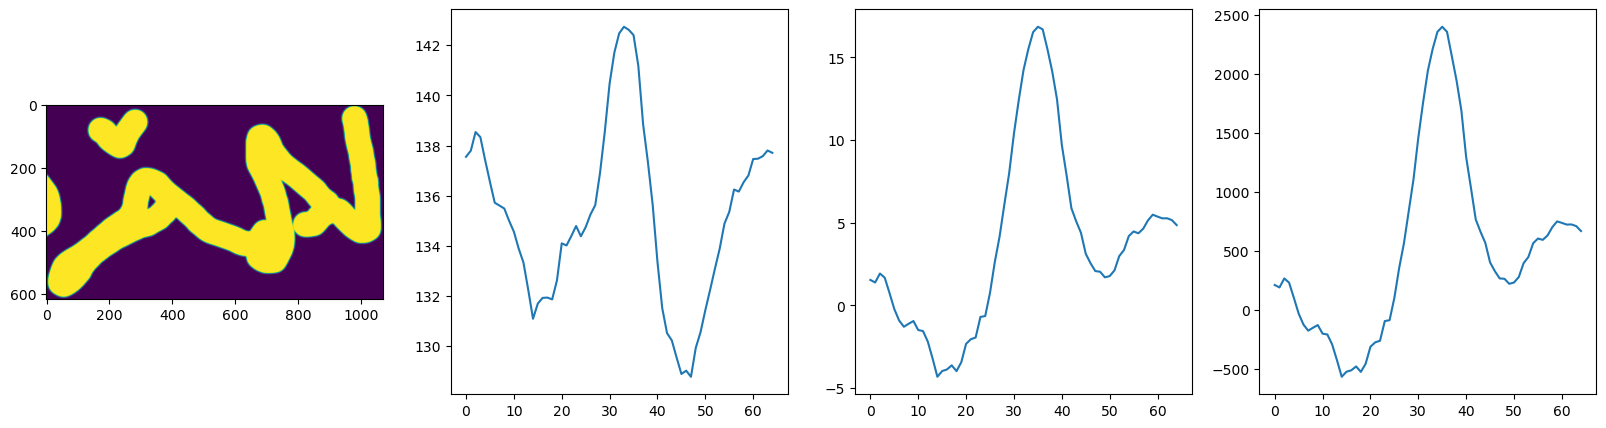

  0%|          | 0/65 [00:00<?, ?it/s]

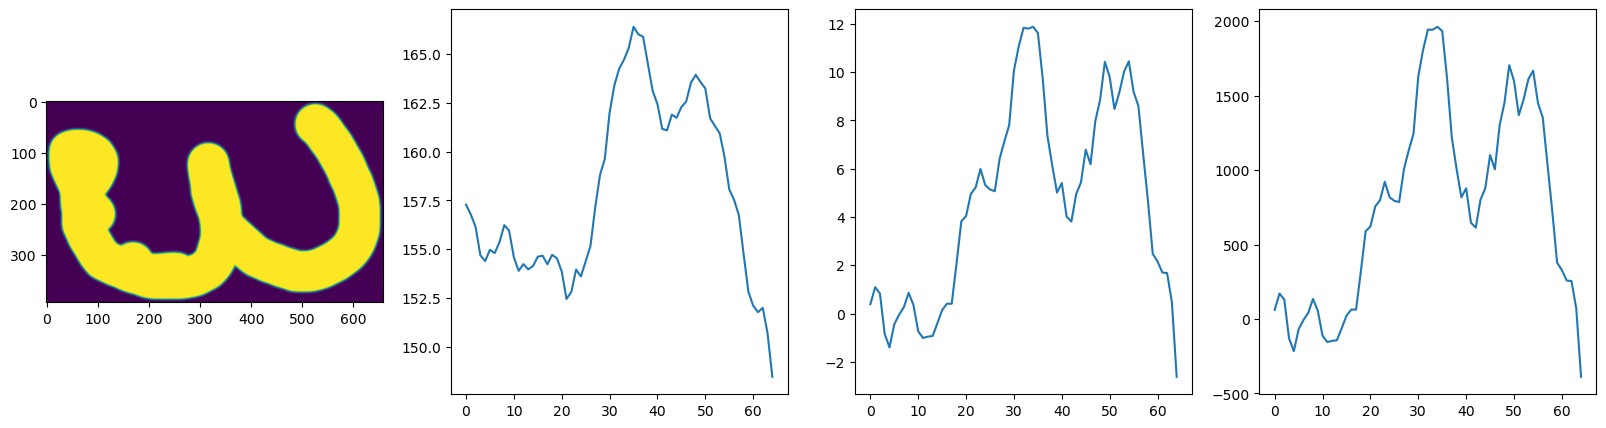

  0%|          | 0/65 [00:00<?, ?it/s]

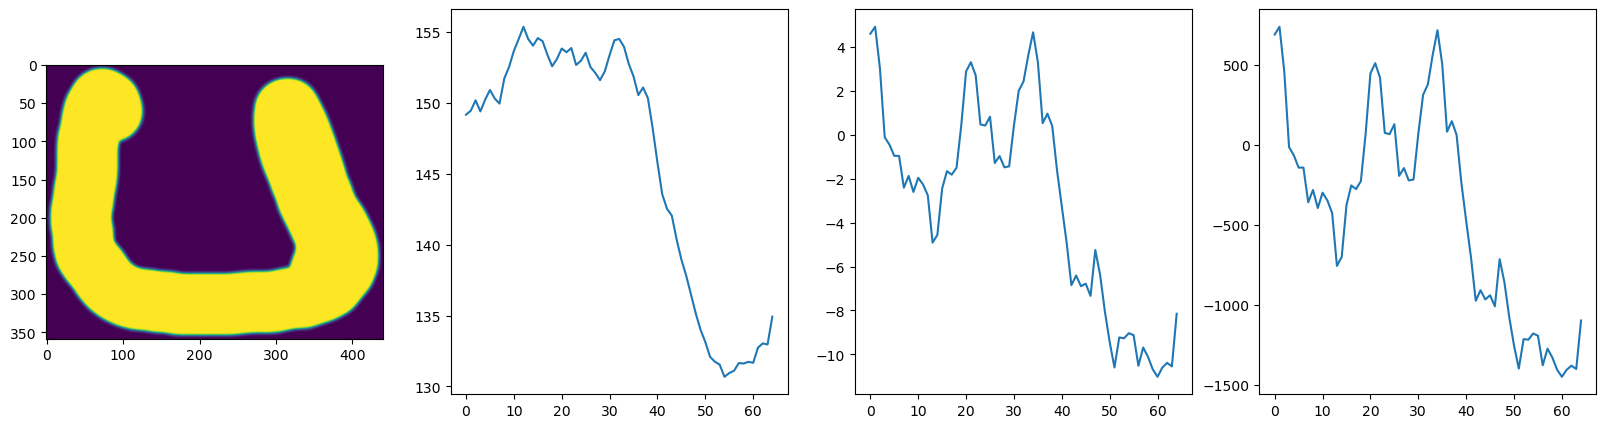

  0%|          | 0/65 [00:00<?, ?it/s]

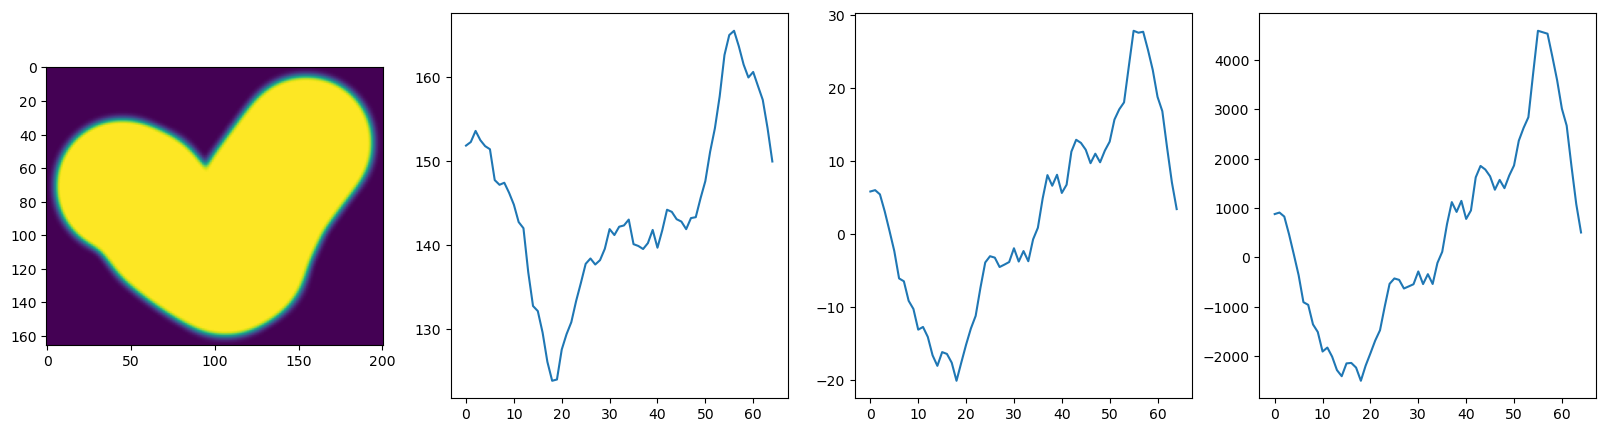

In [19]:
from PIL import Image
img_mask_path='C:/PHerc1667.volpkg/paths/20231210121321/20231210121321_inklabels.png'
img_mask=cv2.imread(img_mask_path,0)
numLabels,bbox,stats,_=cv2.connectedComponentsWithStats(img_mask,4, cv2.CV_32S)
for i in range(1, 20):
    fig,ax=plt.subplots(ncols=4,figsize=(20,5))
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    x2=x+w
    y2=y+h
    ax[0].imshow(img_mask[y:y2,x:x2])
    means=[]
    contrast=[]

    for i in tqdm(range(65)):
        layer_img=np.array(Image.open(f"{output_path}/{i}.png"))
        layer_img=layer_img[y:y2,x:x2]
        means.append(layer_img[img_mask[y:y2,x:x2]>128].mean())
        contrast.append(layer_img[img_mask[y:y2,x:x2]>128].mean()-layer_img[img_mask[y:y2,x:x2]<128].mean())
    
    ax[1].plot(np.arange(0,65),means)
    ax[2].plot(np.arange(0,65),contrast)
    ax[3].plot(np.arange(0,65),[contrast[j]*means[j] for j in range(65)])
    # ax[1].set(xticks=np.arange(0,65))
    plt.show()
